In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.set_random_seed(2019)

def plot_decision_boundary(model,x,y):
    x_min, x_max = x[:,0].min()-1, x[:,0].max()+1
    y_min, y_max = x[:,1].min()-1, x[:,0].max()+1
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min,x_max,h), np.arange(y_min, y_max, h))
    
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx,yy,Z,cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(x[:,0], x[:,1], c =np.squeeze(y), cmap=plt.cm.Spectral)

np.random.seed(1)
m =400
N = int(m/2)
D =2
x = np.zeros((m,D))
y = np.zeros((m,1), dtype='uint8')
a = 4

for j in range(2):
    ix = range(N*j, N*(j+1))
    t = np.linspace(j*3.12, (j+1)*3.12, N) + np.random.randn(N)*0.2
    r = a*np.sin(4*t) + np.random.randn(N)*0.2
    x[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j

In [ ]:
%matplotlib inline

plt.scatter(x[:,0],x[:,1], c = np.squeeze(y),cmap=plt.cm.Spectral)

In [ ]:
x = tf.constant(x, dtype=tf.float32, name='x')
y = tf.constant(y, dtype=tf.float32, name='y')

In [ ]:
#尝试logistic 方法
x = tf.constant(x, dtype=tf.float32, name='x')
y = tf.constant(y, dtype=tf.float32, name='y')

w = tf.get_variable(initializer=tf.random_normal_initializer(), shape=(2,1), dtype=tf.float32, name='weights')
b = tf.get_variable(initializer=tf.zeros_initializer(), shape=(1), dtype=tf.float32, name='bias')

In [ ]:
def logistic_model(x):
    logit = tf.sigmoid(tf.matmul(x,w)+b)
    return logit

y_ = logistic_model(x)

loss = tf.losses.log_loss(predictions=y_, labels=y)

lr = 1e-1
optimizer = tf.train.GradientDescentOptimizer(loss)
train_op = optimizer.minimize(loss)

sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

for e in range(100):
    sess.run(train_op)
    if (e+1) % 10 ==0:
        loss_numpy = loss.eval(session=sess)
        print('Epoch: %d, Loss: %.6f' % (e+1, loss_numpy))

In [ ]:
model_input = tf.placeholder(shape=(None,2), dtype=tf.float32, name='logistic_input')

logistic_output = logistic_model(model_input)

def plot_logistic(x_data):
    y_pred_numpy = sess.run(logistic_output, feed_dict={model_input:x_data})
    out = np.greater(y_pred_numpy,0.5).astype(np.float32)
    return np.squeeze(out)

In [ ]:
plot_decision_boundary(plot_logistic, x.eval(session=sess), y.eval(session=sess))

In [ ]:
#?plt.contourf

In [16]:
#tf.reset_default_graph()

#两层神经网络
with tf.variable_scope('layer1'):
    w1 = tf.get_variable(initializer=tf.random_normal_initializer(stddev=0.01),dtype=tf.float32, shape=(2,4),name="weigths1")
    b1 = tf.get_variable(initializer=tf.zeros_initializer(),dtype=tf.float32, shape=(4), name="bias1")

with tf.variable_scope('layer2'):
    w2 = tf.get_variable(initializer=tf.random_normal_initializer(stddev=0.01),dtype=tf.float32, shape=(4,1),name="weigths2")
    b2= tf.get_variable(initializer=tf.zeros_initializer(), shape=(1),dtype=tf.float32, name="bias2")

def two_network(nn_input):
    with tf.variable_scope('two_network'):
        net = tf.matmul(nn_input,w1)+b1
        net = tf.tanh(net)
        
        net = tf.matmul(net,w2)+b2
        net = tf.sigmoid(net)
        return net


In [17]:
net = two_network(x)

loss_two = tf.losses.log_loss(predictions=net, labels=y)

lr =1 
optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr)
train_op = optimizer.minimize(loss_two, var_list=[w1,b1,w2,b2])

saver = tf.train.Saver()

sess.run(tf.global_variables_initializer())

for e in range(10000):
    sess.run(train_op)
    if (e+1) % 1000 ==0:
        loss_numpy = loss_two.eval(session=sess)
        print('Epoch: {}, Loss: {}'.format(e+1, loss_numpy))
    if (e+1) % 5000 == 0:
        saver.save(sess=sess, save_path='First_Save/model.ckpt', global_step=(e+1))

Epoch: 1000, Loss: 0.2856254279613495
Epoch: 2000, Loss: 0.27238380908966064
Epoch: 3000, Loss: 0.26521292328834534
Epoch: 4000, Loss: 0.2603556513786316
Epoch: 5000, Loss: 0.25689005851745605
Epoch: 6000, Loss: 0.2543255090713501
Epoch: 7000, Loss: 0.2523673474788666
Epoch: 8000, Loss: 0.25083184242248535
Epoch: 9000, Loss: 0.24960023164749146
Epoch: 10000, Loss: 0.24859312176704407


In [18]:
nn_out = two_network(model_input)

In [19]:
def plot_network(input_data):
    y_pred_numpy = sess.run(nn_out, feed_dict={model_input:input_data})
    out = np.greater(y_pred_numpy, 0.5).astype(np.float32)
    return np.squeeze(out)

Text(0.5,1,'2 layer network')

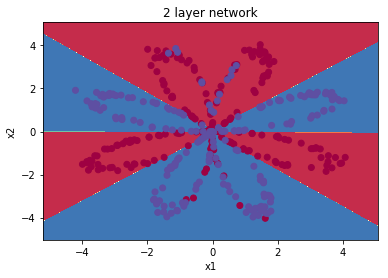

In [20]:
plot_decision_boundary(plot_network, x.eval(session=sess), y.eval(session=sess))
plt.title('2 layer network')

In [ ]:
sess.close()

In [ ]:
sess = tf.InteractiveSession()
#模型的恢复
saver = tf.train.import_meta_graph('First_Save/model.ckpt-10000.meta')
saver.restore(sess,'First_Save/model.ckpt-10000')
print(w1.eval(session=sess))
plot_decision_boundary(plot_network,x.eval(session=sess), y.eval(session=sess))

In [2]:
#tf.reset_default_graph()
x = tf.constant(x, dtype=tf.float32, name='x')
y = tf.constant(y, dtype=tf.float32, name='y')

In [3]:
#5层神经网络
def hidden_layer(layer_input, output_depth, scope='hidden_layer', reuse=None):
    input_depth = layer_input.get_shape()[-1]
    with tf.variable_scope(scope,reuse=reuse):
        w = tf.get_variable(initializer=tf.random_normal_initializer(), shape=(input_depth, output_depth),
                            name='weights')
        b = tf.get_variable(initializer=tf.zeros_initializer(),shape=(output_depth), name="bias")
        net = tf.matmul(layer_input,w)+b
        return net

In [4]:
def DNN(x, output_depths, scope = 'DNN', reuse=None):
    net =x
    for i, output_depth in enumerate(output_depths):
        print(i)
        net = hidden_layer(net, output_depth, scope = 'layer%d' % i, reuse = reuse)
        net = tf.tanh(net)
    net = hidden_layer(net,1,scope='classification',reuse=reuse)
    return tf.sigmoid(net)

In [5]:
dnn = DNN(x, [10,10,10,10])

0
1
2
3


In [9]:
loss_dnn = tf.losses.log_loss(predictions=dnn, labels=y)
lr = 0.1
optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr)
train_op = optimizer.minimize(loss)

In [10]:
sess = tf.InteractiveSession()

/usr/local/lib/python3.5/dist-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [11]:
sess.run(tf.global_variables_initializer())

In [12]:
for e in range(10000):
    sess.run(train_op)
    if (e+1) % 1000 == 0:
        loss_numpy = loss_dnn.eval(session=sess)
        print('Epoch: {}, Loss: {}'.format(e+1, loss_numpy))

Epoch: 1000, Loss: 0.1666695922613144
Epoch: 2000, Loss: 0.14114123582839966
Epoch: 3000, Loss: 0.12536479532718658
Epoch: 4000, Loss: 0.11108673363924026
Epoch: 5000, Loss: 0.10885003954172134
Epoch: 6000, Loss: 0.09620025008916855
Epoch: 7000, Loss: 0.09199898689985275
Epoch: 8000, Loss: 0.08213885128498077
Epoch: 9000, Loss: 0.08112547546625137
Epoch: 10000, Loss: 0.07679705321788788


In [13]:
model_input = tf.placeholder(shape=(None,2), dtype=tf.float32, name='logistic_input')
dnn_out = DNN(model_input,[10,10,10,10],reuse=True)

0
1
2
3


In [14]:
def plot_dnn(input_data):
    y_pred_numpy = sess.run(dnn_out,feed_dict={model_input:input_data})
    out = np.greater(y_pred_numpy,0.5).astype(np.float32)
    return np.squeeze(out)

Text(0.5,1,'4 layer network')

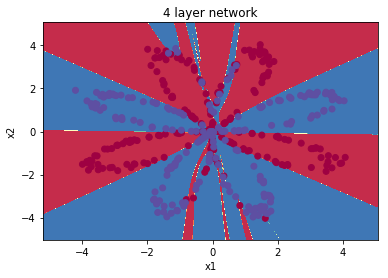

In [15]:
plot_decision_boundary(plot_dnn, x.eval(session=sess),y.eval(session=sess))
plt.title('4 layer network')